In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
v=pd.read_csv('House_Rent_Dataset.csv')
v.head(4)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner


In [3]:
for i in v.columns:
    print(i,'\n')
    print(v[i].unique(),'\n')
    print(v[i].nunique(),'\n')

Posted On 

['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-07-08' '2022-07-09

In [4]:
v.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
v.duplicated().sum()

0

In [6]:
v.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [7]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


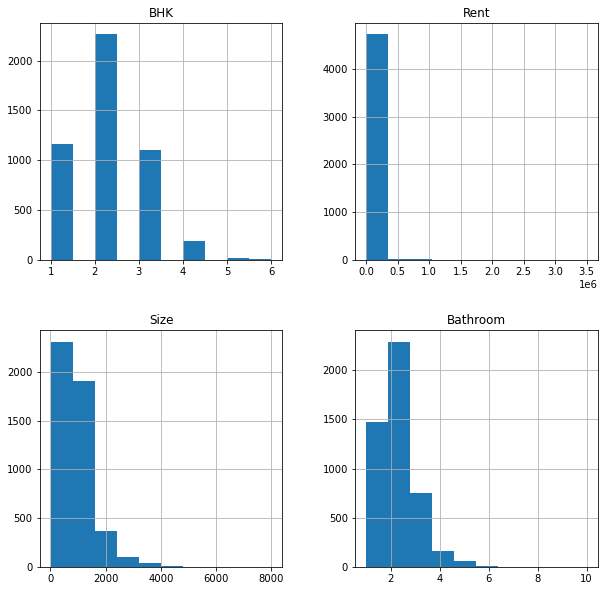

In [56]:
v.hist(figsize=(10,10))
plt.show()

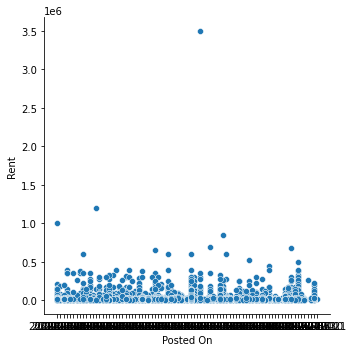

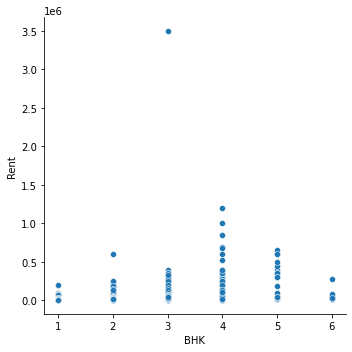

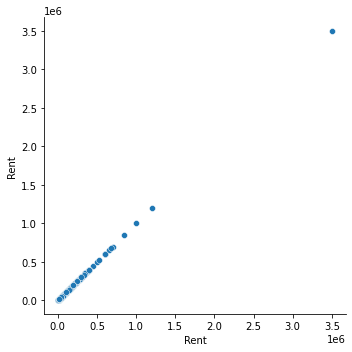

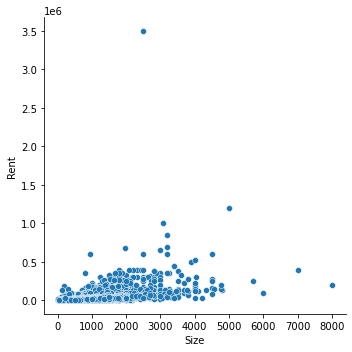

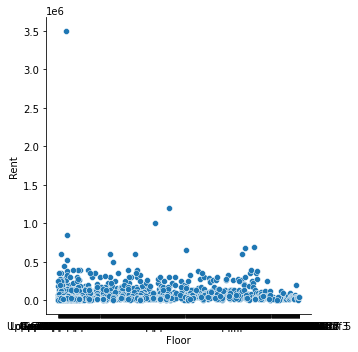

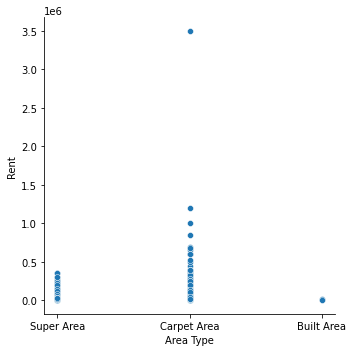

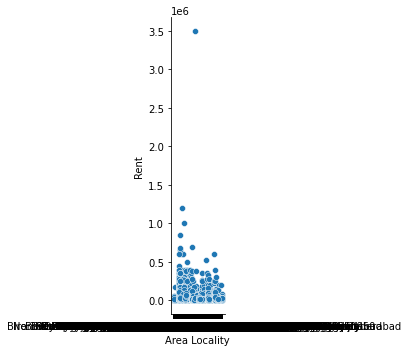

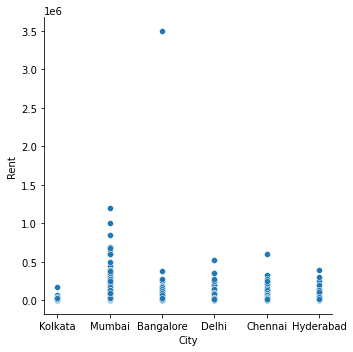

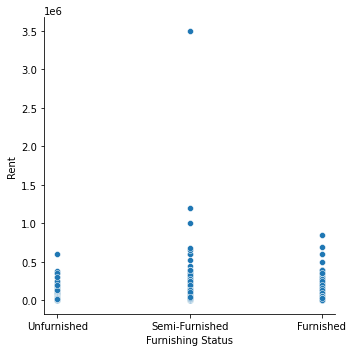

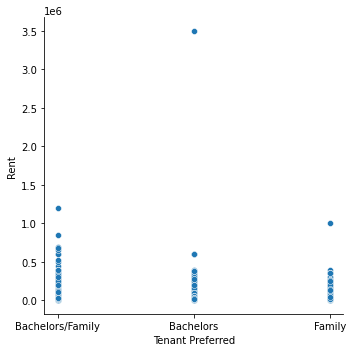

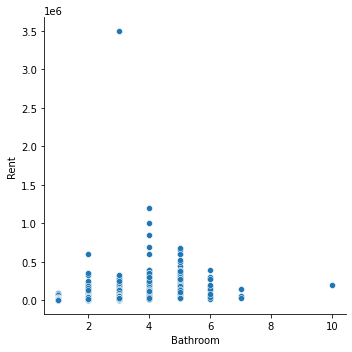

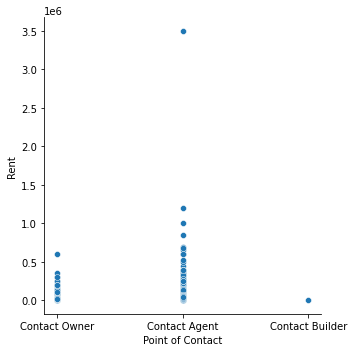

In [59]:
for i in v.columns:
    sns.relplot(x=i,y="Rent",data=v)
plt.show()

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


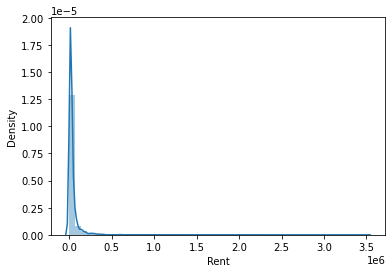

In [55]:
#rent 
sns.distplot(v["Rent"])
plt.show()

<AxesSubplot:>

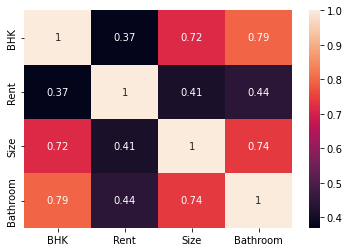

In [8]:
import seaborn as sns
sns.heatmap(v.corr(),annot=True)

In [9]:
v.dtypes=="object"

Posted On             True
BHK                  False
Rent                 False
Size                 False
Floor                 True
Area Type             True
Area Locality         True
City                  True
Furnishing Status     True
Tenant Preferred      True
Bathroom             False
Point of Contact      True
dtype: bool

In [10]:
v.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [11]:
vv=v.drop(['Posted On','Floor','Area Locality'],axis='columns')

In [12]:
vv.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [13]:
vv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Area Type          4746 non-null   object
 4   City               4746 non-null   object
 5   Furnishing Status  4746 non-null   object
 6   Tenant Preferred   4746 non-null   object
 7   Bathroom           4746 non-null   int64 
 8   Point of Contact   4746 non-null   object
dtypes: int64(4), object(5)
memory usage: 333.8+ KB


In [14]:
vv.duplicated().sum()

260

In [15]:
vv.shape

(4746, 9)

In [16]:
h=vv.drop_duplicates()

In [17]:
h.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [18]:
h.shape

(4486, 9)

In [19]:
h.duplicated().sum()

0

In [20]:
h1=pd.get_dummies(h,drop_first=True)

In [21]:
h1.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,20000,800,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,17000,1000,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,10000,800,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,7500,850,1,1,0,0,0,0,1,0,0,1,0,0,0,1


In [22]:
h1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4486 entries, 0 to 4745
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   BHK                                4486 non-null   int64
 1   Rent                               4486 non-null   int64
 2   Size                               4486 non-null   int64
 3   Bathroom                           4486 non-null   int64
 4   Area Type_Carpet Area              4486 non-null   uint8
 5   Area Type_Super Area               4486 non-null   uint8
 6   City_Chennai                       4486 non-null   uint8
 7   City_Delhi                         4486 non-null   uint8
 8   City_Hyderabad                     4486 non-null   uint8
 9   City_Kolkata                       4486 non-null   uint8
 10  City_Mumbai                        4486 non-null   uint8
 11  Furnishing Status_Semi-Furnished   4486 non-null   uint8
 12  Furnishing Status_Un

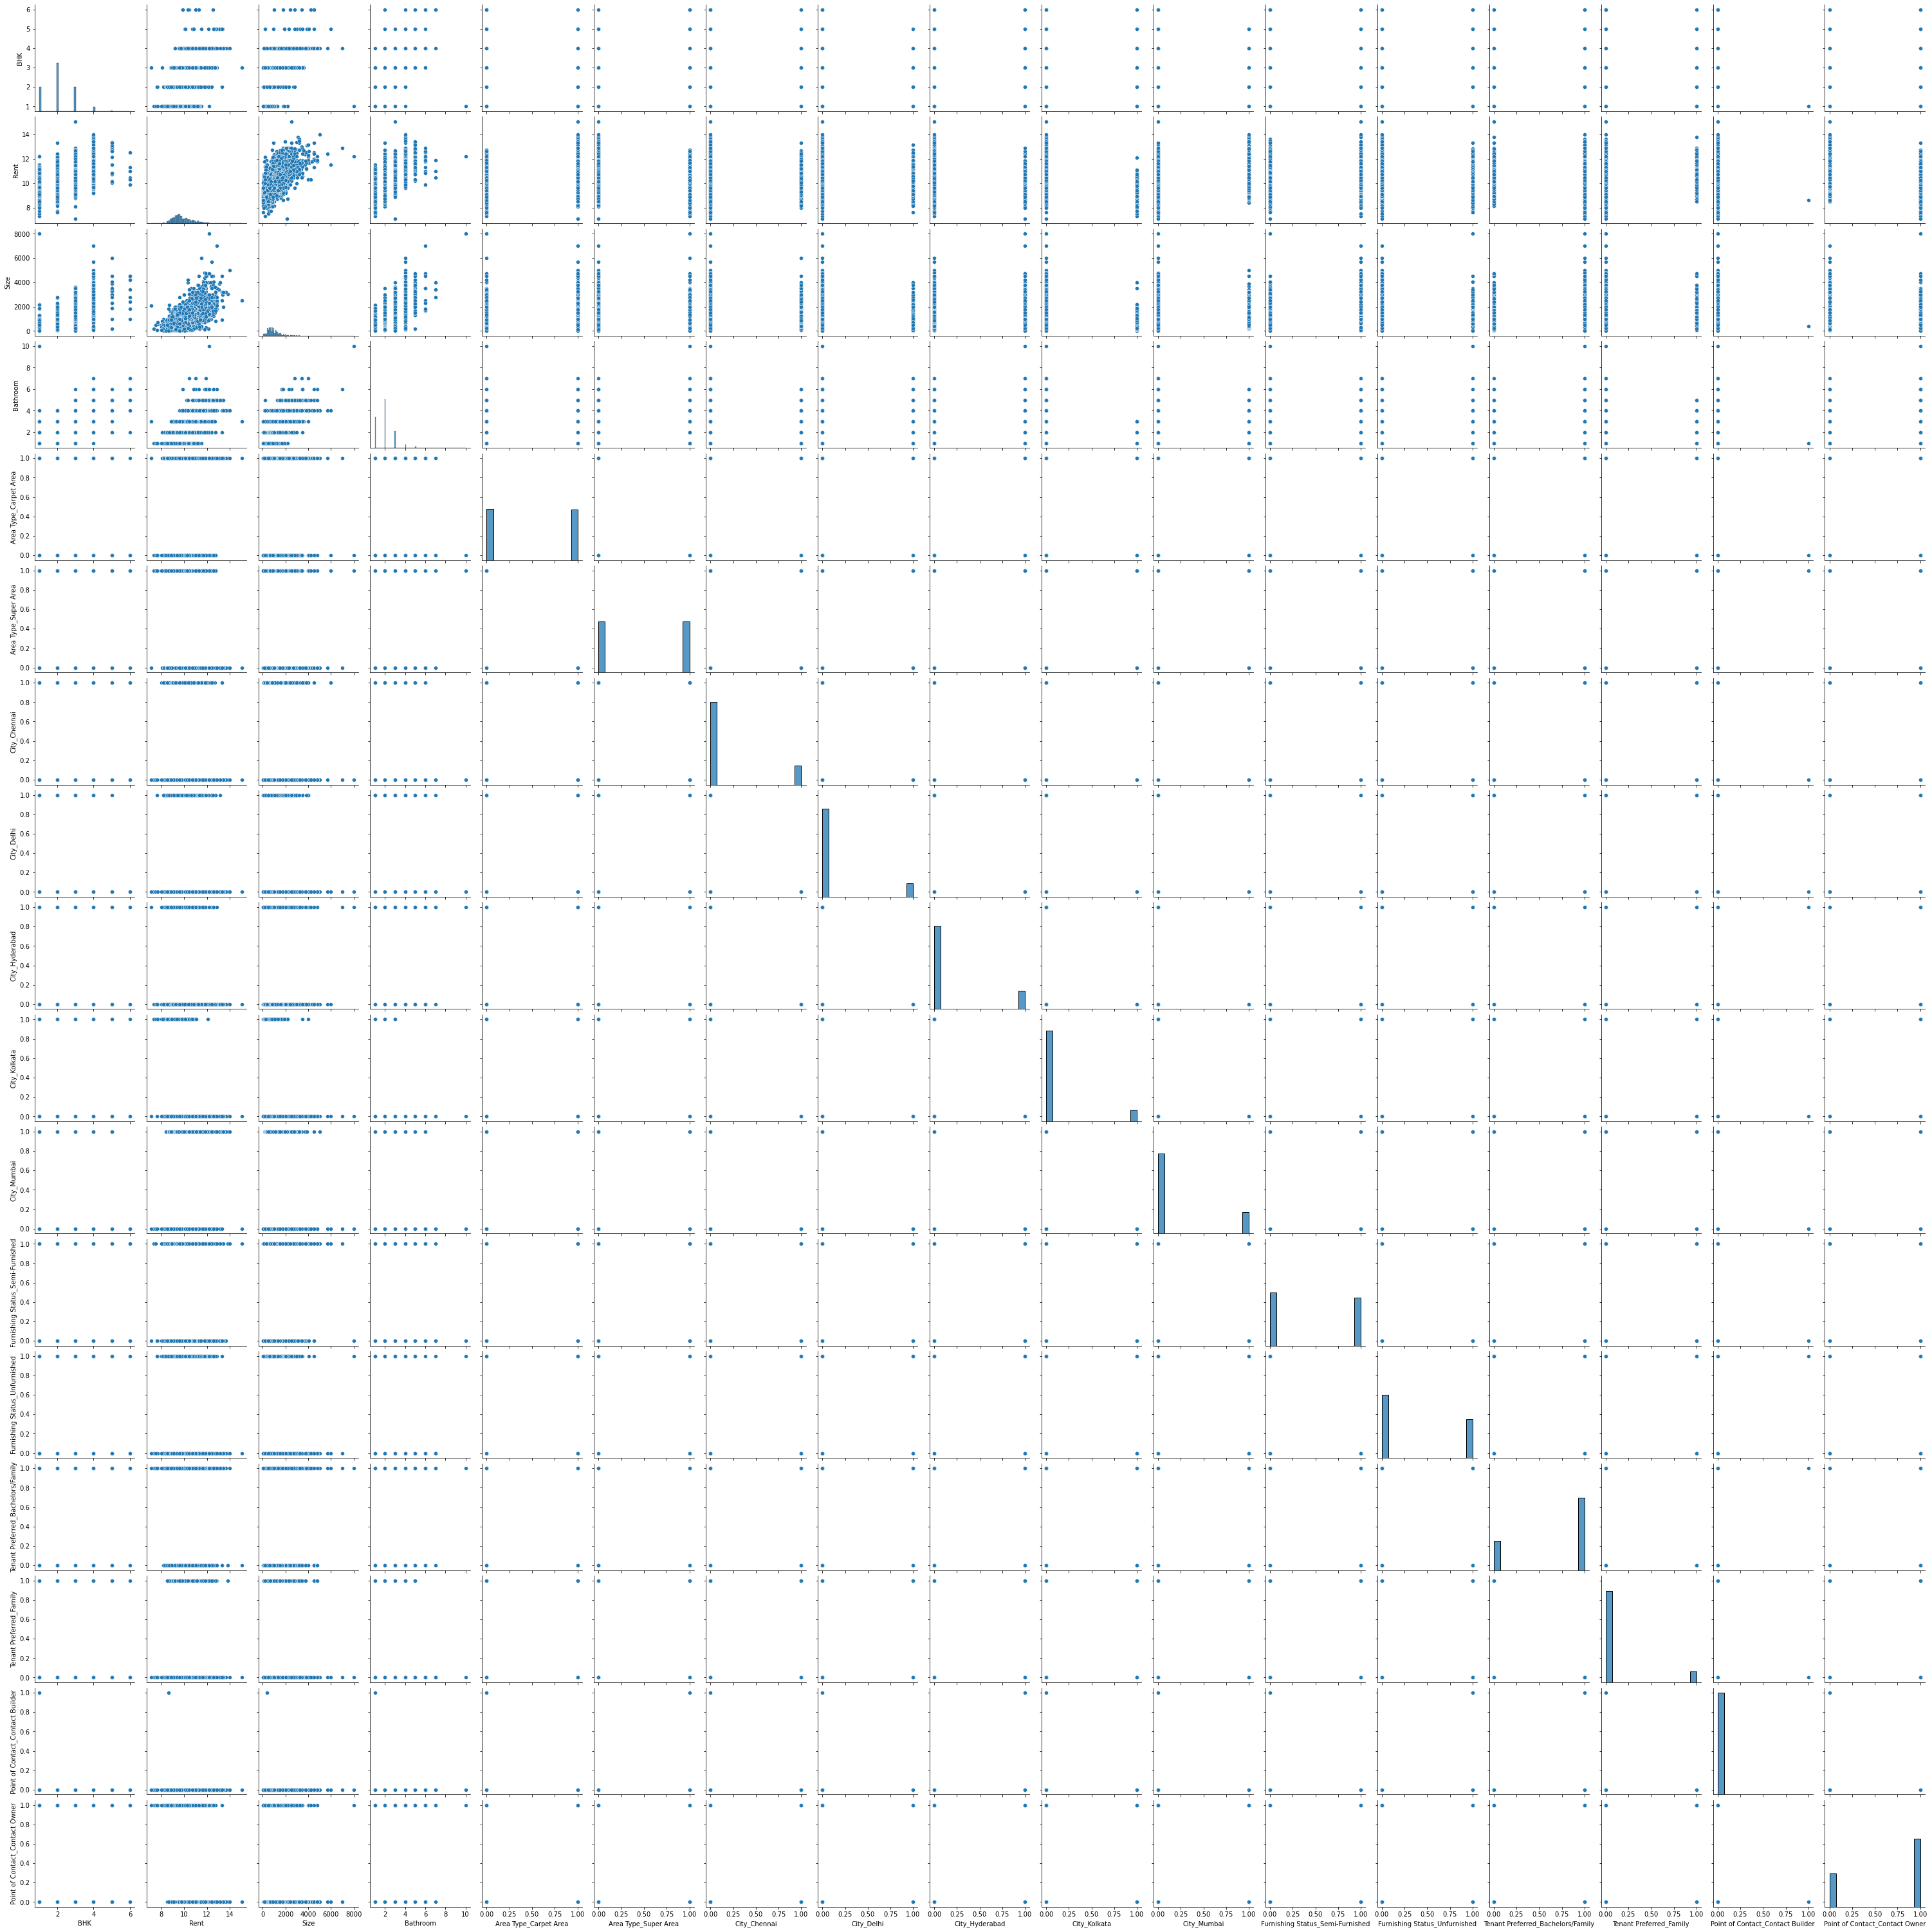

In [53]:
sns.pairplot(h1)
plt.show()

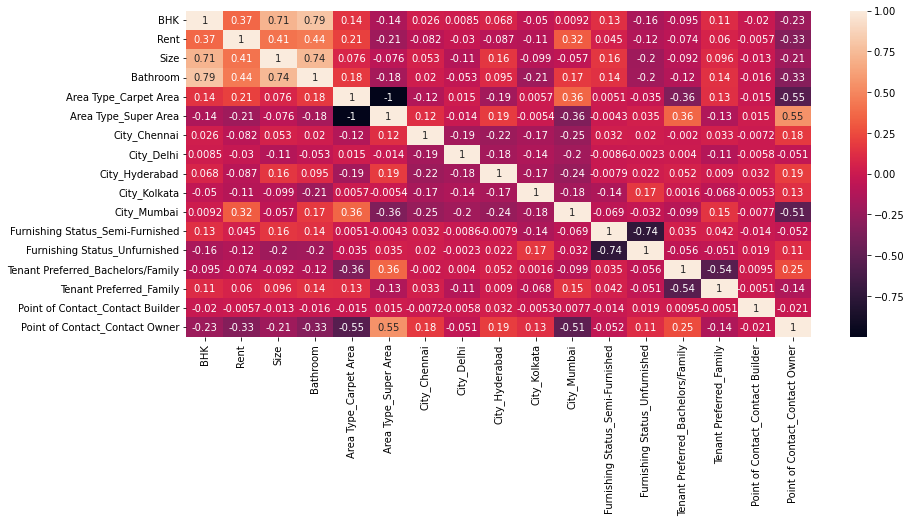

In [23]:
plt.figure(figsize=(14,6))
sns.heatmap(h1.corr(),annot=True)
plt.show()

In [24]:
h1.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,20000,800,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,17000,1000,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,10000,800,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,7500,850,1,1,0,0,0,0,1,0,0,1,0,0,0,1


In [25]:
#converting rent to normal_distribution
h1['Rent']=np.log(h1['Rent'])

C:\Users\kamal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


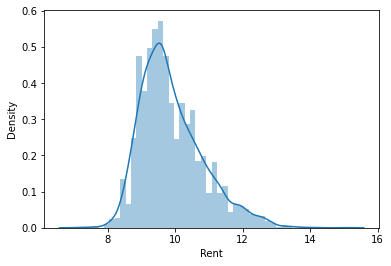

In [57]:
sns.distplot(h1["Rent"])
plt.show()

In [26]:
h1.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,9.210340,1100,2,0,1,0,0,0,1,0,0,1,1,0,0,1
1,2,9.903488,800,1,0,1,0,0,0,1,0,1,0,1,0,0,1
2,2,9.740969,1000,1,0,1,0,0,0,1,0,1,0,1,0,0,1
3,2,9.210340,800,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,2,8.922658,850,1,1,0,0,0,0,1,0,0,1,0,0,0,1


In [27]:
X=h1.drop('Rent',axis='columns')
y=h1['Rent']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [79]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3588, 16), (898, 16), (3588,), (898,))

In [80]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [81]:
## Train multiple models 

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTreeRegression': DecisionTreeRegressor(),
    'RandomForestRegression':RandomForestRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae,rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("MAE:",mae)
    print("RMSE:",rmse)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
MAE: 0.29741036863804177
RMSE: 0.4076372451721478
R2 score 81.32365904529433


Lasso
Model Training Performance
MAE: 0.6174380752673845
RMSE: 0.7767346010869967
R2 score 32.190681133669294


Ridge
Model Training Performance
MAE: 0.2974142326735553
RMSE: 0.40762083906483537
R2 score 81.32516234211815


Elasticnet
Model Training Performance
MAE: 0.6174877539727713
RMSE: 0.7767765556039715
R2 score 32.183355635235685


DecisionTreeRegression
Model Training Performance
MAE: 0.37341116131872
RMSE: 0.5264148053123799
R2 score 68.85414421504923


RandomForestRegression
Model Training Performance
MAE: 0.3165790035604148
RMSE: 0.4258277292723511
R2 score 79.61963511806475




In [74]:
mdl3=RandomForestRegressor()
mdl3.fit(X_train,y_train)

RandomForestRegressor()

In [75]:
ypf=mdl3.predict(X_test)

In [76]:
mdl3.score(X_train,y_train)

0.9512593895467534

In [78]:
mdl3.score(X_test,y_test)

0.7983483817545174

# Let perform DecisionTreeRegressor hypertuning technique by using GridSearchCV increase the stability of the model

In [60]:
# Number of trees in decison tree regressor
crit = ["squared_error", "friedman_mse", "absolute_error"]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# The depth of the tree max_depth
max_depth = [i for i in range(5,30,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,100]
# Min no of samples required to each leaf to split                        ---- Pruning
min_samples_leaf = [1,2,5,10]

In [61]:
# creating the girdsearchcv

grid= {'criterion':crit,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [62]:
from sklearn.model_selection import GridSearchCV
mdl5=DecisionTreeRegressor()
dr_model =GridSearchCV(estimator = mdl5,param_grid=grid,cv=4)

In [63]:
dr_model.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 11, 17, 23, 29],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100]})

In [64]:
dr_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 15}

In [46]:
mdl3=DecisionTreeRegressor(criterion='squared_error',
 max_depth=11,
 max_features='auto',
 min_samples_leaf=10,
 min_samples_split=5)#2

In [47]:
mdl3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, max_features='auto', min_samples_leaf=10,
                      min_samples_split=5)

In [69]:
print("Decision Tree Regression with HyperTuningtechnique")
print('='*35)
print("Training _score :",mdl3.score(X_train,y_train))
print("Testing_score :",mdl3.score(X_test,y_test))

Decision Tree Regression with HyperTuningtechnique
Training _score : 0.8436544247487276
Testing_score : 0.813517646728667


In [71]:
mdl5=LinearRegression()
mdl5.fit(X_train,y_train)

LinearRegression()

In [72]:
print("LinearRegression")
print('='*35)
print("Training_score :",mdl5.score(X_train,y_train))
print("Testing_score :",mdl5.score(X_test,y_test))

LinearRegression
Training_score : 0.8059792495044468
Testing_score : 0.8132365904529433
